In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [310]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [311]:
import pandas as pd
import io

data = pd.read_csv('/content/drive/MyDrive/Dataset/glass.csv')
data.head()
p=data.columns
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [312]:
p = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [313]:
p={}
for i in range(len(p)-1):
  p.append(p[i])

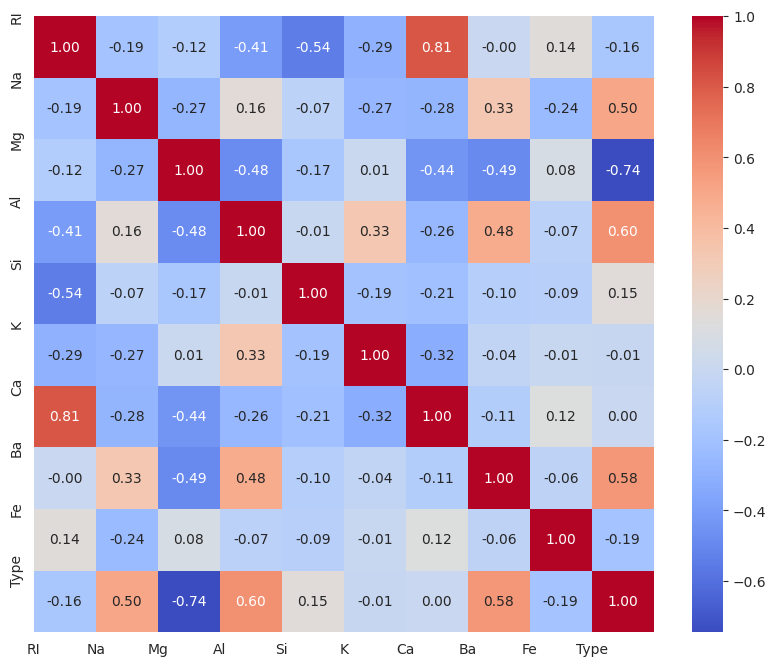

In [314]:
#correlation
cor=data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(cor, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(cor.columns)), cor.columns);
#Apply yticks
plt.yticks(range(len(cor.columns)), cor.columns)
plt.show()

In [315]:
X= data.drop('Type', axis = 1).values
y= data['Type'].values.reshape(-1,1)

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (65, 9)
Shape of y_train:  (149, 1)
Shape of y_test:  (65, 1)


**Logistic Regression**

In [317]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lg = LogisticRegression()
steps = [
    ('scalar', StandardScaler()),
    ('model', LogisticRegression())
]
lg_pipe = Pipeline(steps)

In [318]:
parameters = {
    'model__C' : [1,10,100,1000,10000],
    'model__fit_intercept' : [True],
    'model__multi_class' : ['auto'],
    'model__tol' : [0.0001],
    'model__solver' : ['newton-cg','lbfgs','sag','saga'],
    'model__n_jobs' : [-1],
    'model__max_iter' : [5000],
    'model__random_state' : [42]
}
classifier_lg = GridSearchCV(lg_pipe, parameters, cv = 3)
classifier_lg = classifier_lg.fit(X_train, y_train.ravel())

In [319]:
from sklearn.metrics import accuracy_score

y_pred_lg_train = classifier_lg.predict(X_train)
accuracy_lg_train = accuracy_score(y_train,y_pred_lg_train)
print("Train set accuracy: ", accuracy_lg_train)

y_pred_lg_test = classifier_lg.predict(X_test)
accuracy_lg_test = accuracy_score(y_test,y_pred_lg_test)
print("Test set accuracy: ", accuracy_lg_test)

Train set accuracy:  0.7516778523489933
Test set accuracy:  0.6615384615384615


In [320]:
print(y_pred_lg_test)

[1 7 1 7 2 2 1 1 2 2 6 2 1 2 6 5 2 3 2 6 2 7 7 7 2 2 1 1 2 1 2 2 2 2 1 7 5
 1 1 2 2 7 1 2 1 6 2 2 2 1 1 1 1 2 1 2 1 1 2 1 2 2 3 7 3]


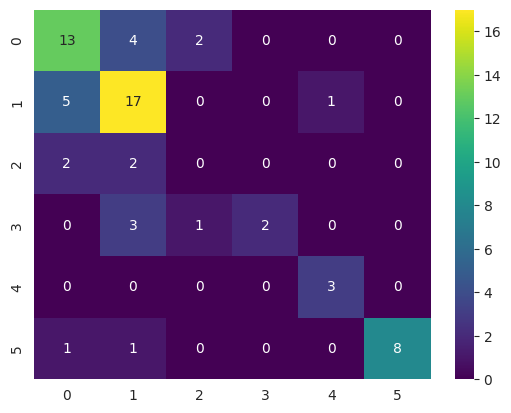

              precision    recall  f1-score   support

           1      0.619     0.684     0.650        19
           2      0.630     0.739     0.680        23
           3      0.000     0.000     0.000         4
           5      1.000     0.333     0.500         6
           6      0.750     1.000     0.857         3
           7      1.000     0.800     0.889        10

    accuracy                          0.662        65
   macro avg      0.666     0.593     0.596        65
weighted avg      0.685     0.662     0.653        65



In [321]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.heatmap(confusion_matrix(y_test, y_pred_lg_test), annot=True, cmap='viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_lg_test, digits=3))

In [322]:
import math
print('mean squared error = ', mean_squared_error(y_test,y_pred_lg_test))
print('RMSE = ', math.sqrt(mean_squared_error(y_test,y_pred_lg_test)))

mean squared error =  2.076923076923077
RMSE =  1.4411533842457842


In [323]:
data.head

<bound method NDFrame.head of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

**KNN K-NEAREST NEGIBHOURS**

In [324]:
#KNN K-NEAREST NEGIBHOURS
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [325]:
parameters = {  'model__algorithm' : ['brute'],
                'model__leaf_size' : [30,50,70,90,110],
                'model__metric' : ['minkowski'],
                'model__p':[1],
                'model__n_neighbors' : [3,5,11,19],
                'model__weights' : ['uniform', 'distance'],
                'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [326]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set accuracy: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set accuracy: ", accuracy_knn_test)

Training set accuracy:  1.0
Test set accuracy:  0.6923076923076923


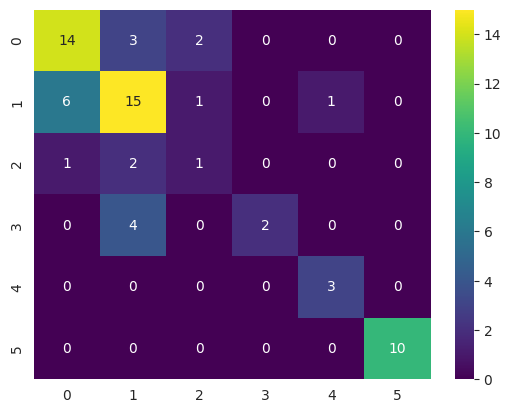

              precision    recall  f1-score   support

           1      0.667     0.737     0.700        19
           2      0.625     0.652     0.638        23
           3      0.250     0.250     0.250         4
           5      1.000     0.333     0.500         6
           6      0.750     1.000     0.857         3
           7      1.000     1.000     1.000        10

    accuracy                          0.692        65
   macro avg      0.715     0.662     0.658        65
weighted avg      0.712     0.692     0.685        65



In [327]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_knn_test, digits=3))

**Support vector machiene SVM**

In [328]:
#Support vector machiene SVM
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
      ('scalar', StandardScaler()),
      ('model', SVC())
]
svm_linear_pipe = Pipeline(steps)

In [329]:
parameters = {'model__kernel':['linear'],
              'model__C' : [1,10,100,1000,10000],
              'model__random_state' : [42]
}
classifier_svm_linear = GridSearchCV(svm_linear_pipe, parameters, cv = 3)
classifier_svm_linear = classifier_svm_linear.fit(X_train, y_train.ravel())

In [330]:
y_pred_svm_linear_train = classifier_svm_linear.predict(X_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set accuracy: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set accuracy: ", accuracy_svm_linear_test)

Training set accuracy:  0.7583892617449665
Test set accuracy:  0.6615384615384615


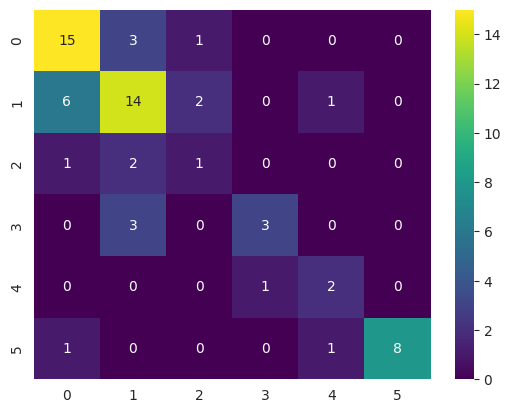

              precision    recall  f1-score   support

           1      0.652     0.789     0.714        19
           2      0.636     0.609     0.622        23
           3      0.250     0.250     0.250         4
           5      0.750     0.500     0.600         6
           6      0.500     0.667     0.571         3
           7      1.000     0.800     0.889        10

    accuracy                          0.662        65
   macro avg      0.631     0.602     0.608        65
weighted avg      0.677     0.662     0.663        65



In [331]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_svm_linear_test, digits=3))

**DECISSION** **TREE**

In [332]:
#DECISSION TREE CLASSIFIER CART
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [333]:
# Applying Grid Search to find the best model and the best parameters
parameters = [{ "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                "model__min_samples_split": np.arange(2, 11),
                "model__criterion": ["gini"],
                "model__random_state" : [42]
              }
]
classifier_dt = GridSearchCV(estimator = dt_pipe,
                             param_grid = parameters,
                             cv = 3,
                             n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

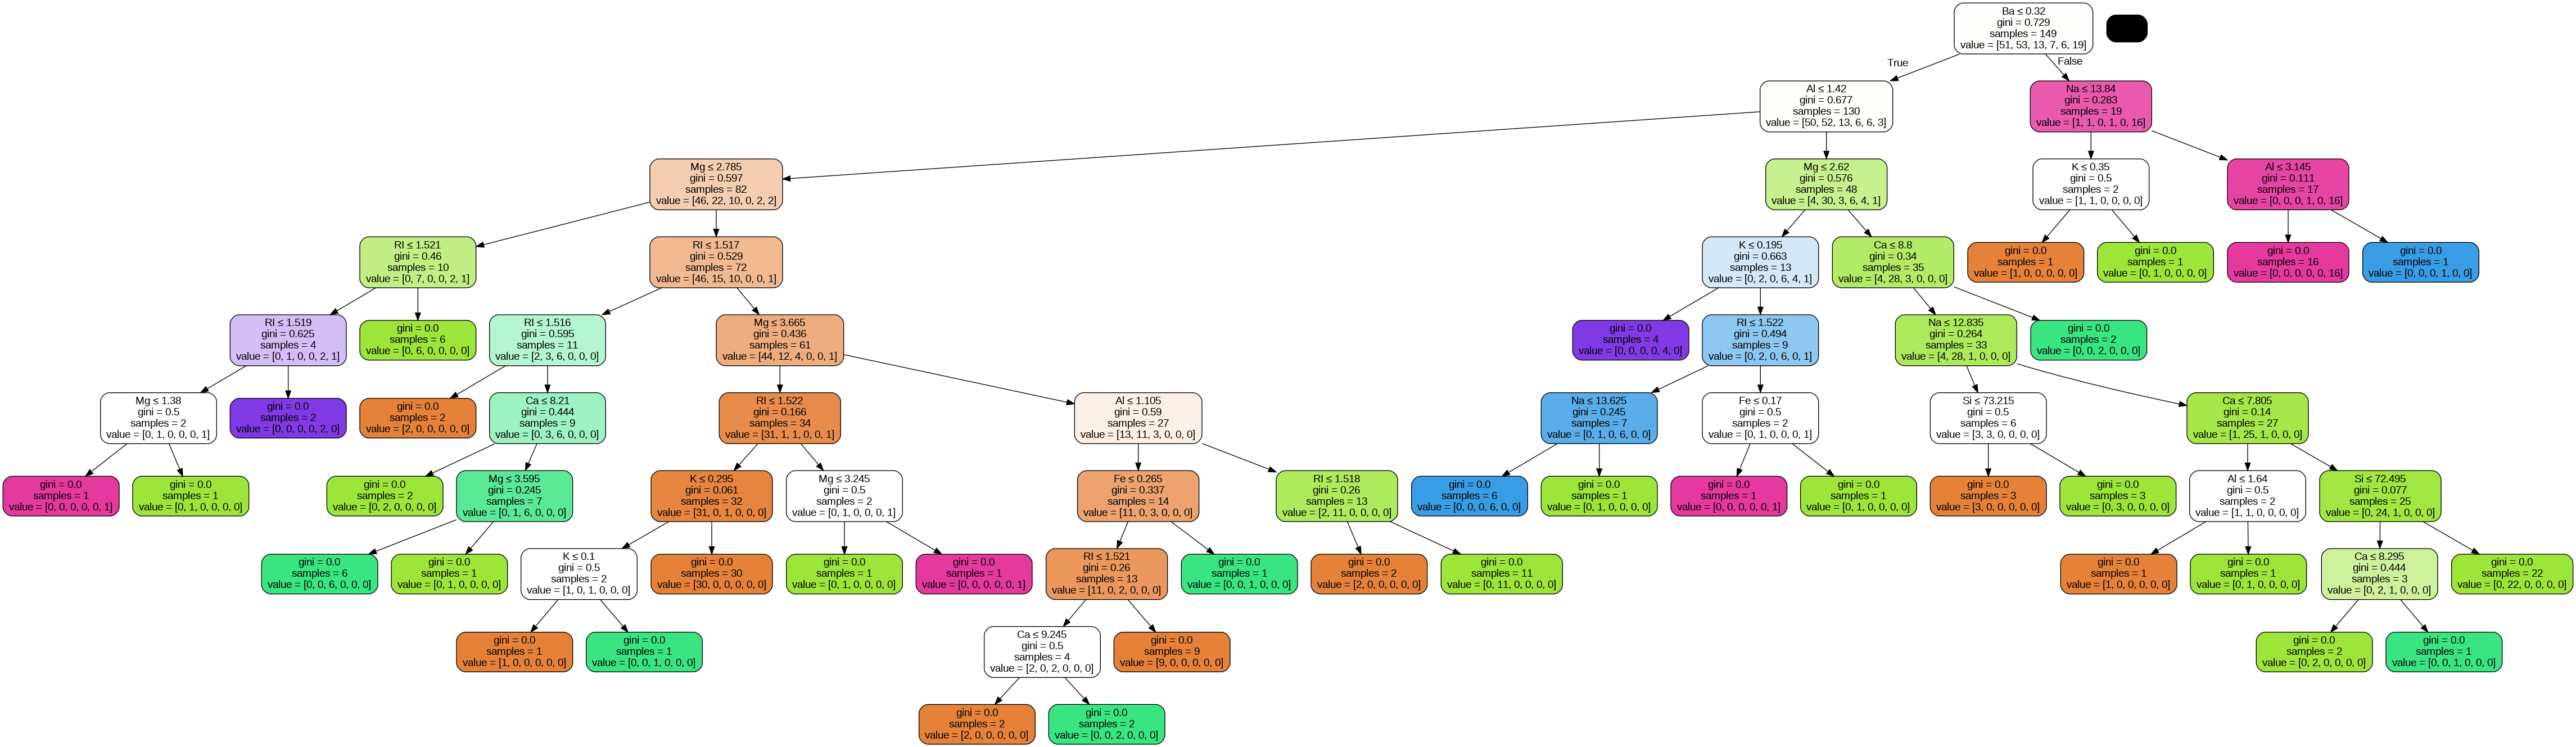

In [334]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

feature_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

dot_data=StringIO()
export_graphviz(DecisionTreeClassifier().fit(X_train, y_train),
                out_file=dot_data,
                filled=True, rounded=True,
                feature_names = feature_names,
                special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [335]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set accuracy: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set accuracy: ", accuracy_dt_test)

Training set accuracy:  0.8120805369127517
Test set accuracy:  0.7230769230769231


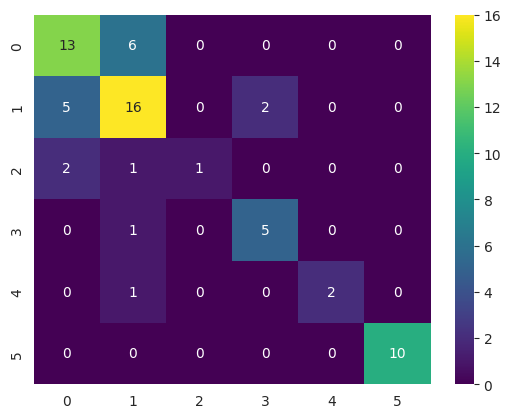

              precision    recall  f1-score   support

           1      0.650     0.684     0.667        19
           2      0.640     0.696     0.667        23
           3      1.000     0.250     0.400         4
           5      0.714     0.833     0.769         6
           6      1.000     0.667     0.800         3
           7      1.000     1.000     1.000        10

    accuracy                          0.723        65
   macro avg      0.834     0.688     0.717        65
weighted avg      0.744     0.723     0.717        65



In [336]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_dt_test, digits=3))

**RANDOMFOREST CLASSIFICATION**

In [337]:
#RANDOMFOREST CLASSIFICATION
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [338]:
parameters = {"model__n_estimators": [int(x) for x in np.linspace(start =50, stop = 500, num = 10)],
              "model__max_features": ["auto", "sqrt"],
              "model__max_depth": [int(x) for x in np.linspace(10, 110, num = 11)],
              "model__min_samples_split": [2, 5, 10],
              "model__min_samples_leaf": [1, 2, 4],
              "model__bootstrap": [True, False],
              "model__criterion": ["gini"],
              "model__random_state" : [42] }

classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                                  param_distributions = parameters,
                                  n_iter= 100,
                                  cv = 3,
                                  random_state=42,
                                  verbose = 4,
                                  n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [339]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set accaracy: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Training set accaracy: ", accuracy_rf_test)

Training set accaracy:  1.0
Training set accaracy:  0.7846153846153846


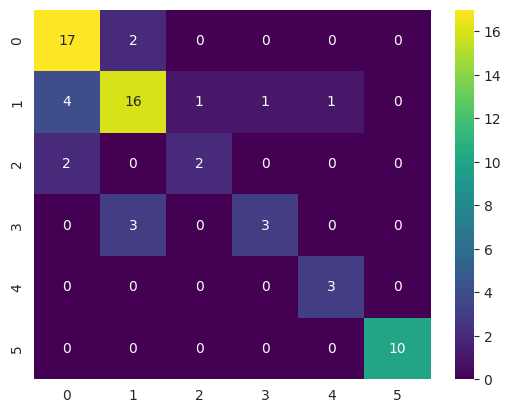

              precision    recall  f1-score   support

           1      0.739     0.895     0.810        19
           2      0.762     0.696     0.727        23
           3      0.667     0.500     0.571         4
           5      0.750     0.500     0.600         6
           6      0.750     1.000     0.857         3
           7      1.000     1.000     1.000        10

    accuracy                          0.785        65
   macro avg      0.778     0.765     0.761        65
weighted avg      0.784     0.785     0.778        65



In [340]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
import math
print(classification_report(y_test, y_pred_rf_test, digits=3))

**NAIVE BAYES**

**1. GAUSSIAN**

In [341]:
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)
print(y_test_hat)

(214, 9) (214, 1)
(65, 9) (65, 1)
[2 7 1 7 2 2 1 1 2 2 7 7 2 2 2 7 2 1 2 7 2 7 7 7 2 2 2 1 2 1 2 2 2 2 1 7 5
 1 2 2 2 7 1 2 2 7 2 2 2 1 1 1 1 1 1 2 2 1 2 1 2 1 2 7 7]


In [342]:
# training
from sklearn import naive_bayes
model = naive_bayes.GaussianNB()
model.fit(X, y)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
print(y_test_hat)
print(metrics.accuracy_score(y_test, y_test_hat))

# Print F1 score with micro average
print("MICRO")
print(metrics.f1_score(y_test, y_test_hat, average='micro'))

# Print F1 score with macro average
print("MACRO")
print(metrics.f1_score(y_test, y_test_hat, average='macro'))

# Print F1 score with weighted average
print("WEIGHTED")
print(metrics.f1_score(y_test, y_test_hat, average='weighted'))

print(model.predict_proba(X_test))

[1 7 1 7 3 6 1 1 1 1 6 2 1 1 6 2 7 3 3 6 2 7 7 7 1 2 1 1 2 1 2 1 3 1 1 7 5
 3 1 7 2 7 3 1 1 6 2 3 2 1 1 1 1 1 1 3 7 1 2 1 1 1 1 7 2]
0.5384615384615384
MICRO
0.5384615384615384
MACRO
0.5331465919701214
WEIGHTED
0.5026071967248438
[[6.61745751e-001 6.11790312e-003 3.32136254e-001 8.96212732e-008
  0.00000000e+000 2.23212431e-009]
 [1.12880392e-063 9.31200256e-007 3.57039192e-186 1.12263371e-004
  0.00000000e+000 9.99886805e-001]
 [9.37320459e-001 1.35669374e-002 4.91112127e-002 1.39128332e-006
  0.00000000e+000 8.00932107e-014]
 [3.46056071e-062 1.44576441e-005 7.75274779e-181 1.69510643e-003
  0.00000000e+000 9.98290436e-001]
 [4.46253894e-001 7.05739213e-002 4.82878285e-001 3.48756115e-006
  0.00000000e+000 2.90412102e-004]
 [9.95376140e-079 3.23164297e-010 3.81201671e-181 1.06356597e-008
  9.99999989e-001 2.21827749e-023]
 [7.77693316e-001 5.53264923e-003 2.16773612e-001 1.42298545e-007
  0.00000000e+000 2.80542091e-007]
 [7.75992615e-001 1.95537931e-002 2.04440247e-001 5.21019221e-0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


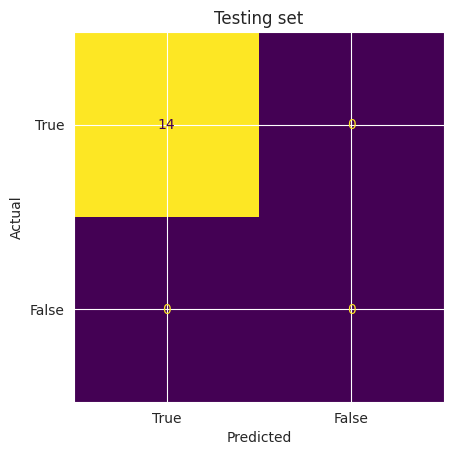

In [343]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=[True, False], colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing set')
plt.show()

**2. CATEGORICAL**

In [344]:
# training
from sklearn import naive_bayes
model = naive_bayes.CategoricalNB(alpha=0) #not-smoothing
model.fit(X, y)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
print(y_test_hat)
print(metrics.accuracy_score(y_test, y_test_hat))
print(model.predict_proba(X_test))

[2 7 1 7 2 2 1 1 2 1 6 5 2 2 6 5 2 2 1 6 2 7 7 7 2 1 1 1 5 1 1 2 2 1 1 7 5
 1 1 2 1 7 2 2 1 6 1 2 1 1 1 2 1 2 2 2 7 1 5 1 1 2 1 7 5]
0.6615384615384615
[[3.86711542e-01 4.21233796e-01 1.91615318e-01 2.37463807e-24
  2.32930435e-24 4.39343696e-04]
 [1.22893263e-24 1.08694007e-03 5.37606805e-24 5.31572224e-14
  2.28123040e-13 9.98913060e-01]
 [6.69600947e-01 6.74226457e-02 2.62976407e-01 4.05564098e-24
  5.96732338e-13 2.07334789e-14]
 [1.22893263e-24 1.08694007e-03 5.37606805e-24 5.31572224e-14
  2.28123040e-13 9.98913060e-01]
 [1.02674648e-01 8.97325352e-01 8.35807213e-12 1.45011135e-23
  1.42242758e-13 1.41206512e-14]
 [4.40374189e-32 1.00000000e+00 4.21985061e-31 7.00977181e-20
  4.29746859e-20 9.70996086e-21]
 [6.03311027e-01 3.73519363e-01 2.31696093e-02 9.47545017e-24
  1.54909272e-34 1.38787127e-13]
 [4.97224043e-01 4.21253697e-01 7.83917880e-02 5.34318807e-24
  8.73530399e-25 3.13047172e-03]
 [1.28248028e-01 8.71751972e-01 3.32176530e-12 3.16976358e-23
  5.18208381e-14 9.7742308

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


**3. BERNOULLI**

In [345]:
# training
from sklearn import naive_bayes
model = naive_bayes.BernoulliNB(alpha=0) #not-smoothing
model.fit(X, y)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
print(y_test_hat)
print(metrics.accuracy_score(y_test, y_test_hat))
print(model.predict_proba(X_test))

[2 7 2 7 1 6 1 1 1 2 6 5 2 1 6 5 7 1 1 6 1 7 7 7 2 1 2 1 2 1 2 1 1 1 2 7 5
 1 2 1 1 7 1 1 2 6 2 1 2 2 1 1 2 1 1 2 2 2 1 2 2 2 2 7 5]
0.5076923076923077
[[4.38316137e-01 4.63793376e-01 8.23060509e-02 1.45146599e-02
  1.37653060e-23 1.06977576e-03]
 [4.35570134e-15 1.79635041e-03 2.70231085e-14 7.75427758e-13
  3.68759222e-12 9.98203650e-01]
 [4.38316137e-01 4.63793376e-01 8.23060509e-02 1.45146599e-02
  1.37653060e-23 1.06977576e-03]
 [9.24633458e-15 4.99197471e-03 4.30237320e-14 5.38719468e-13
  1.56561292e-22 9.95008025e-01]
 [4.61884865e-01 3.73336977e-01 1.15642314e-01 4.67351155e-02
  7.25274060e-13 2.40072881e-03]
 [2.07849520e-13 4.47790867e-02 9.23831297e-13 9.11258130e-12
  7.09124977e-01 2.46095937e-01]
 [4.61884865e-01 3.73336977e-01 1.15642314e-01 4.67351155e-02
  7.25274060e-13 2.40072881e-03]
 [4.61884865e-01 3.73336977e-01 1.15642314e-01 4.67351155e-02
  7.25274060e-13 2.40072881e-03]
 [4.61884865e-01 3.73336977e-01 1.15642314e-01 4.67351155e-02
  7.25274060e-13 2.4007288

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


**4. MULTINOMIAL**

In [346]:
# training
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
model.fit(X, y)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
print(y_test_hat)
print(metrics.accuracy_score(y_test, y_test_hat))
print(model.predict_proba(X_test))

[2 7 1 7 2 2 1 1 2 2 7 7 2 2 2 7 2 1 2 7 2 7 7 7 2 2 2 1 2 1 2 2 2 2 1 7 5
 1 2 2 2 7 1 2 2 7 2 2 2 1 1 1 1 1 1 2 2 1 2 1 2 1 2 7 7]
0.5846153846153846
[[4.40022939e-01 4.43443740e-01 1.03599006e-01 2.80990258e-03
  8.79466345e-03 1.32974859e-03]
 [1.31831339e-02 4.58959836e-02 5.71428235e-03 5.65868275e-02
  6.24620868e-02 8.16157686e-01]
 [4.56433918e-01 4.18063529e-01 1.07641303e-01 1.65809860e-03
  1.52445645e-02 9.58587302e-04]
 [1.38751417e-02 4.86422166e-02 6.19621239e-03 5.98362470e-02
  6.72370307e-02 8.04213152e-01]
 [4.34774331e-01 4.51069837e-01 1.01569090e-01 2.97204075e-03
  7.96362965e-03 1.65107152e-03]
 [1.50989108e-01 2.77076104e-01 3.06948707e-02 1.51539129e-01
  2.03448002e-01 1.86252787e-01]
 [4.51194644e-01 4.36608478e-01 9.94553566e-02 2.75191760e-03
  8.54515788e-03 1.44444570e-03]
 [4.46485912e-01 4.35928866e-01 1.00428665e-01 2.47658316e-03
  1.26794428e-02 2.00053097e-03]
 [4.41212833e-01 4.47328912e-01 9.94453783e-02 3.19013626e-03
  7.26080320e-03 1.5619373

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**NEURAL NETWORK**

In [347]:
#ANN (ARTIFICIAL NEURAL NETHORK)
# Importing the Keras libraries and packases
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [348]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# sc_X= StandardScaler()
# X_train_scaled = sc_X.fit_transform(X_train)
# X_test_scaled = sc_X.fit_transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(149, 9)
(65, 9)


In [349]:
# Defining a function to encode output column
from keras.utils import to_categorical

def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical (data)
    print('Shape of data (AFTER encode): %s\n' % str(encoded.shape))
    return encoded

In [350]:
y_train_encoded = encode(y_train)

Shape of data (BEFORE encode): (149, 1)
Shape of data (AFTER encode): (149, 8)



In [351]:
y_test_encoded = encode(y_test)

Shape of data (BEFORE encode): (65, 1)
Shape of data (AFTER encode): (65, 8)



In [352]:
y_train_encoded = np.delete(y_train_encoded, [0,4] , axis = 1)
y_test_encoded = np.delete(y_test_encoded, [0,4], axis = 1)
print(y_train_encoded[2])
print(y_test_encoded[2])

[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]


In [353]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 9, kernel_initializer = 'uniform',activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform',activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform',activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
history = classifier.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), batch_size = 100, epochs = 1150)

Epoch 1/1150
2/2 [==============================] - 1s 208ms/step - loss: 1.7915 - accuracy: 0.1678 - val_loss: 1.7904 - val_accuracy: 0.3385
Epoch 2/1150
2/2 [==============================] - 0s 53ms/step - loss: 1.7900 - accuracy: 0.3557 - val_loss: 1.7891 - val_accuracy: 0.3385
Epoch 3/1150
2/2 [==============================] - 0s 38ms/step - loss: 1.7884 - accuracy: 0.3356 - val_loss: 1.7877 - val_accuracy: 0.3077
Epoch 4/1150
2/2 [==============================] - 0s 53ms/step - loss: 1.7868 - accuracy: 0.3490 - val_loss: 1.7864 - val_accuracy: 0.2923
Epoch 5/1150
2/2 [==============================] - 0s 60ms/step - loss: 1.7852 - accuracy: 0.3423 - val_loss: 1.7850 - val_accuracy: 0.2923
Epoch 6/1150
2/2 [==============================] - 0s 61ms/step - loss: 1.7836 - accuracy: 0.3423 - val_loss: 1.7835 - val_accuracy: 0.2923
Epoch 7/1150
2/2 [==============================] - 0s 79ms/step - loss: 1.7821 - accuracy: 0.3423 - val_loss: 1.7821 - val_accuracy: 0.2923
Epoch 8/1150

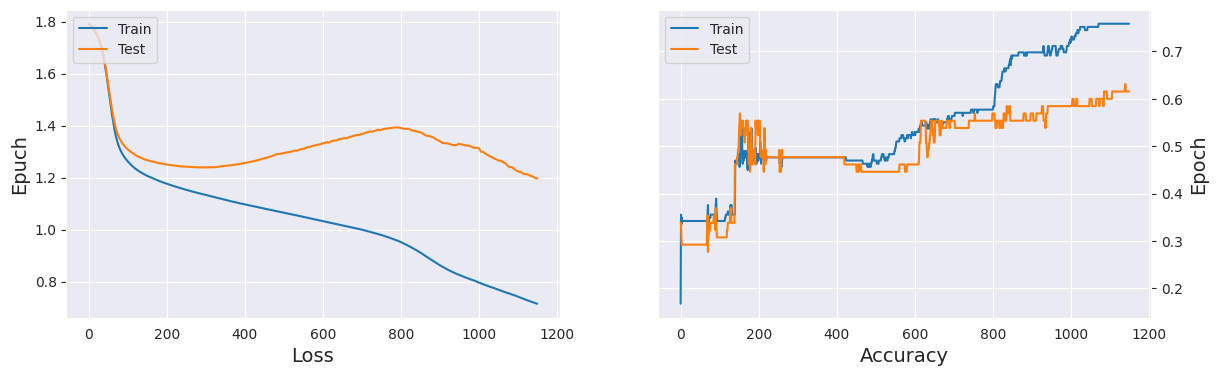

In [354]:
f, axes = plt.subplots(1,2,figsize=(14,4))
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epuch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In [355]:
print("Training  set accuracy: ", history.history.get('accuracy')[-1])
print("Test set accuracy: ", history.history.get('val_accuracy')[-1])

Training  set accuracy:  0.7583892345428467
Test set accuracy:  0.6153846383094788


**COMPARING THE HODELS**

In [356]:
#COMPARING THE HODELS
models = [('Logistic Regression', accuracy_lg_train, accuracy_lg_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
          ('SVM (Linear)', accuracy_svm_linear_train, accuracy_svm_linear_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test),
          ('ANN', history.history.get('accuracy')[-1], history.history.get('val_accuracy')[-1]),
]

In [357]:
predict = pd.DataFrame(data = models, columns=['Model','Training Accuracy','Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,0.751678,0.661538
1,KNN,1.000000,0.692308
2,SVM (Linear),0.758389,0.661538
3,Decision Tree Classification,0.812081,0.723077
4,Random Forest Classification,1.000000,0.784615
5,ANN,0.758389,0.615385


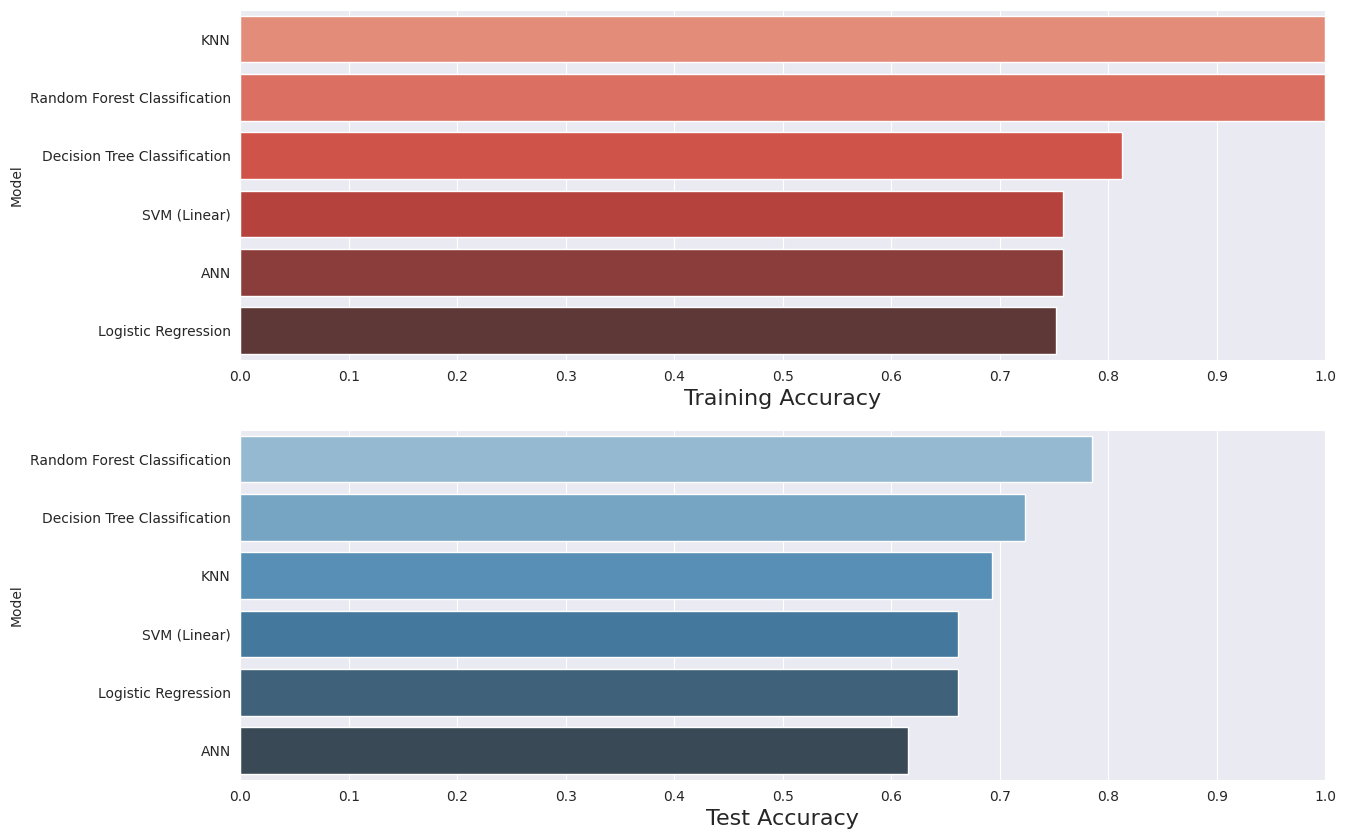

In [358]:
#VISUALIZING MODELS PERFORMANCE

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Reds_d',ax = axes[0])
#axes[0].set (xlabel= 'Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()